In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
from  IPython.display import Audio
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('TESS Toronto emotional speech set data/'):
    for filename in filenames:
        if filename[-3:] == 'wav':
            paths.append(os.path.join(dirname, filename))
            labels.append(filename.split('_')[2][:-4])
print('kerja bagus :)')

kerja bagus :)


In [ ]:
df = pd.DataFrame({'path': paths, 'label': labels})
df.head()

,path,label
0,TESS Toronto emotional speech set data/OAF_ang...,angry
1,TESS Toronto emotional speech set data/OAF_ang...,angry
2,TESS Toronto emotional speech set data/OAF_ang...,angry
3,TESS Toronto emotional speech set data/OAF_ang...,angry
4,TESS Toronto emotional speech set data/OAF_ang...,angry


In [ ]:
df.label.value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

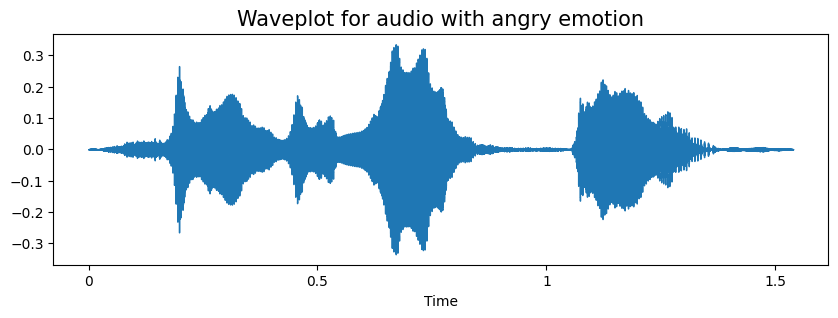

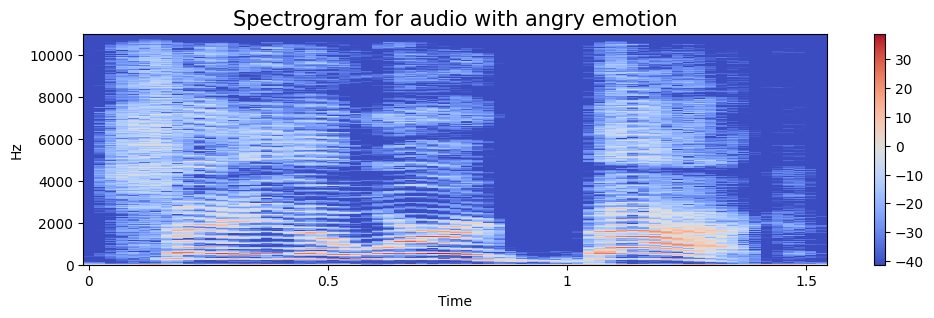

In [ ]:
emotion = 'angry'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

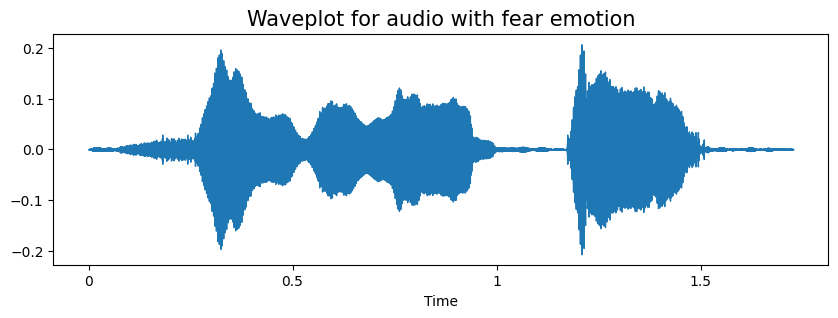

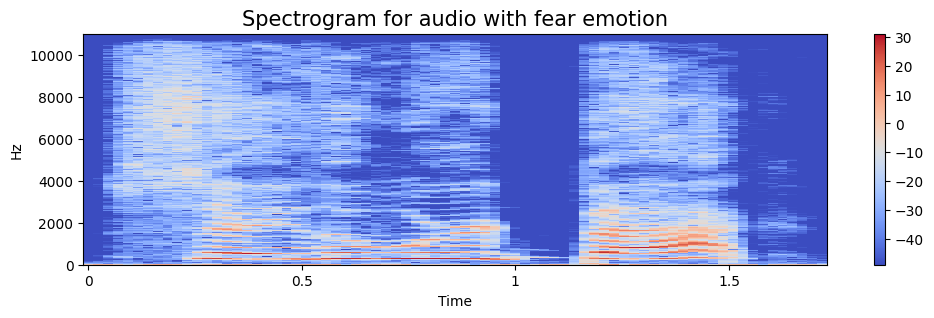

In [ ]:
emotion = 'fear'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

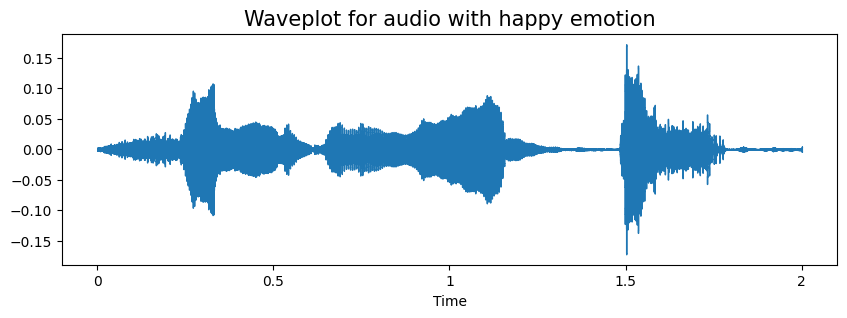

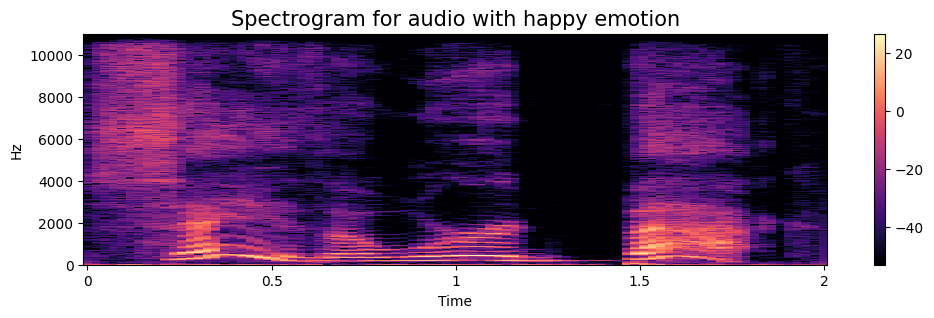

In [ ]:
emotion = 'happy'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

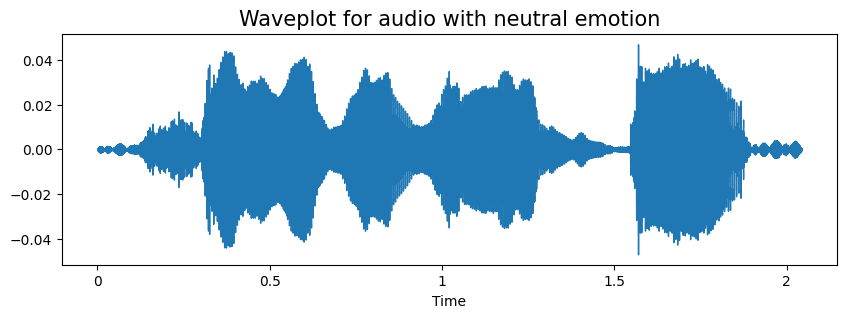

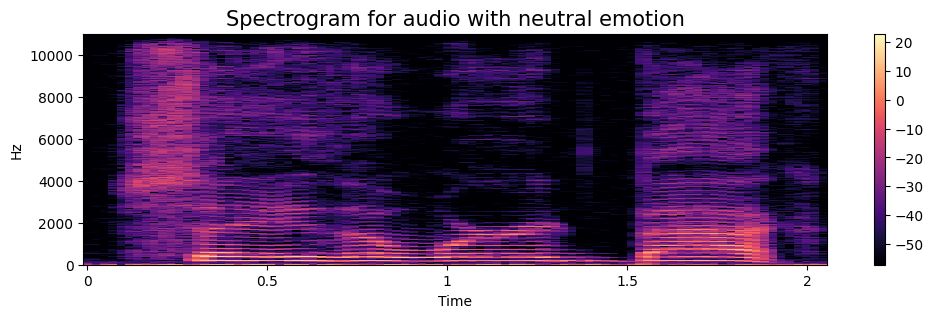

In [ ]:
emotion = 'neutral'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

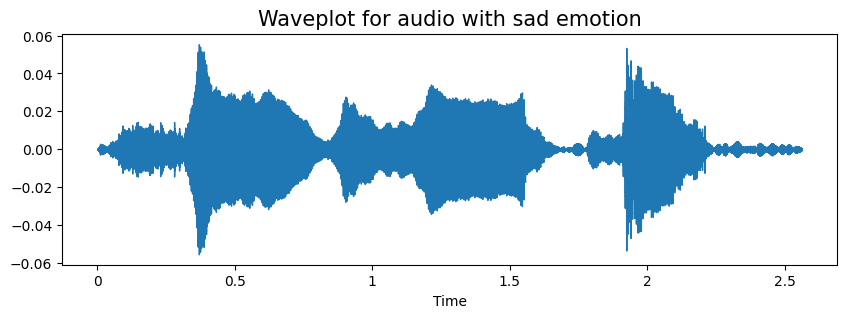

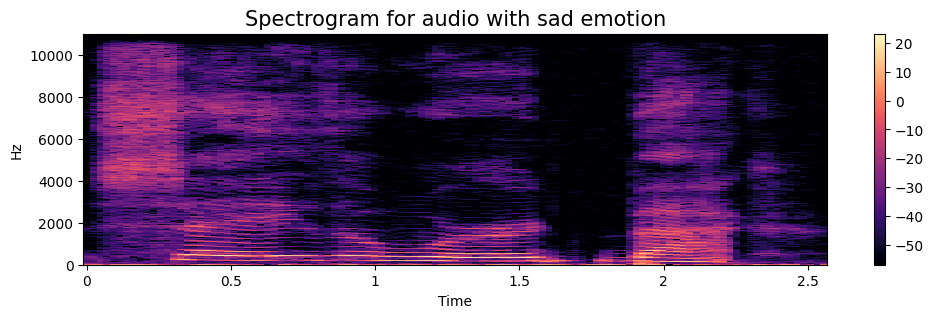

In [ ]:
emotion = 'sad'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

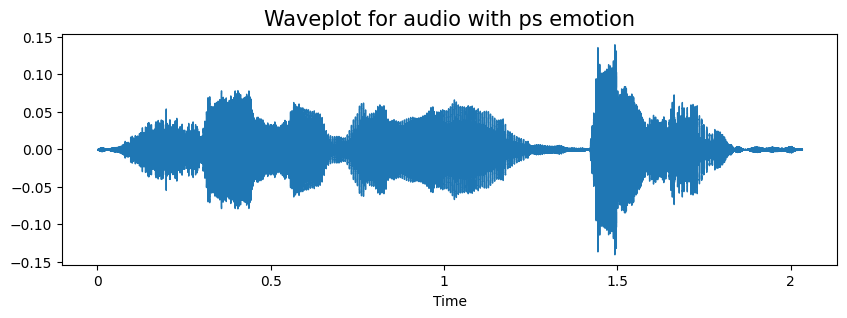

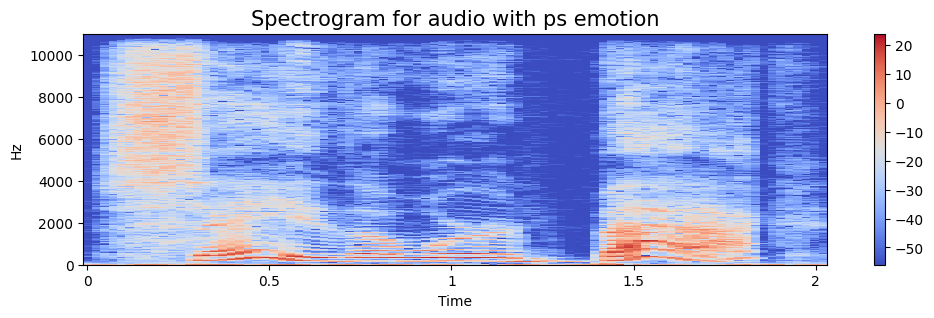

In [ ]:
emotion = 'ps'
path = np.array(df['path'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [ ]:
def extract_mfcc(filename):
    audio, sample_rate = librosa.load(filename, duration=3, offset=0.5)
    mfcss = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T,axis=0)
    return mfcss

In [ ]:
extract_mfcc(df['path'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127558e+00,  1.0075363e+01, -2.0366707e+01, -6.0924487e+00,
       -7.2122846e+00, -5.5736607e-01, -1.8325540e+00,  2.0210165e-01,
        7.2755086e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129221e+00, -4.4365106e+00, -1.6211593e+00, -1.0239840e+01,
       -7.5512629e+00, -1.7968807e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348928e+01,
        1.3413368e+01,  8.3391714e+00,  3.9472216e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099630e+00, -1.8239071e+00,
        4.8689628e+00,  9.3139238e+00,  2.0891497e+00, -1.9064913e+00],
      dtype=float32)

In [ ]:
x_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.124, 1.5550476, -0.21709459, 2...
3       [-403.46118, 76.3237, -12.531775, -22.288858, ...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
5595    [-406.4805, 80.379875, 32.462395, 46.579094, -...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: path, Length: 5600, dtype: object

In [ ]:
X = np.expand_dims(np.array(x_mfcc.tolist()), axis=2)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(np.array(df['label']).reshape(-1, 1)).toarray()
y.shape

(5600, 7)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(40, 1), return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-traina

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
140/140 [==============================] - 3s 6ms/step - loss: 0.9136 - accuracy: 0.6589 - val_loss: 0.4053 - val_accuracy: 0.8777
Epoch 2/20
140/140 [==============================] - 1s 5ms/step - loss: 0.2916 - accuracy: 0.9109 - val_loss: 0.1032 - val_accuracy: 0.9714
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1919 - accuracy: 0.9455 - val_loss: 0.0600 - val_accuracy: 0.9812
Epoch 4/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1590 - accuracy: 0.9569 - val_loss: 0.3367 - val_accuracy: 0.8911
Epoch 5/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1326 - accuracy: 0.9645 - val_loss: 0.0362 - val_accuracy: 0.9857
Epoch 6/20
140/140 [==============================] - 1s 5ms/step - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.0890 - val_accuracy: 0.9652
Epoch 7/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1067 - accuracy: 0.9672 - val_loss: 0.1000 - val_accuracy: 0.9634
Epoch 

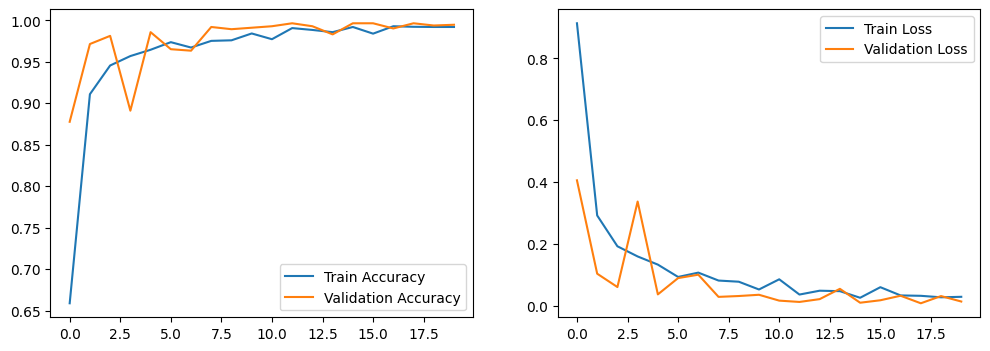

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
def extract_mfcc(filename):
    audio, sample_rate = librosa.load(filename, duration=3, offset=0.5)
    mfcss = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T,axis=0)
    return mfcss

def predict_emotion(filename):
    mfcc = extract_mfcc(filename)
    mfcc.shape
    mfcc = np.expand_dims(mfcc, axis=0)
    mfcc = np.expand_dims(mfcc, axis=2)
    pred = model.predict(mfcc)
    return ohe.inverse_transform(pred)[0][0]

predict_emotion('TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav')

1/1 [==============================] - 0s 163ms/step


'angry'

In [ ]:
predict_emotion('D:\Bangkit Capstone\Model apa hayo\TESS Toronto emotional speech set data\YAF_sad\YAF_back_sad.wav')

1/1 [==============================] - 0s 12ms/step


'sad'

In [ ]:
model.save('model_suara.h5')